# Data Exploration & Preprocessing

Mục tiêu:
- Đọc dữ liệu World Bank đã tổng hợp (2000–2024)
- Khám phá, làm sạch, và chuẩn hóa dữ liệu
- Chia dữ liệu thành train/test để phục vụ các mô hình Machine Learning

Nguồn dữ liệu: `data/worldbank_2000_2024.csv`


# Import các thư viện cần thiết

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Bước 1 - Đọc dữ liệu

Đọc dữ liệu từ file CSV và loại bỏ các bản ghi trùng lặp để đảm bảo chất lượng dữ liệu.


In [7]:
# Đọc dữ liệu
df = pd.read_csv("../data/worldbank_2000_2024.csv")
# Hiển thị 5 dòng đầu
print("=== Dữ liệu gốc (5 dòng đầu) ===")
print(df.head())
# Thông tin tổng quan
print("\n=== Thông tin tổng quan ===")
print(df.info())
# Kích thước dữ liệu ban đầu
print("\nKích thước dữ liệu ban đầu:", df.shape)
# Loại bỏ dữ liệu trùng lặp
rows_before = df.shape[0]
df = df.drop_duplicates()
rows_after = df.shape[0]
removed = rows_before - rows_after
# In kết quả
print("\nKích thước sau khi loại bỏ trùng lặp:", df.shape)
print(f"Đã loại bỏ {removed} dòng trùng lặp.")

=== Dữ liệu gốc (5 dòng đầu) ===
  Country Name Country Code  Year  Population, total  \
0        Aruba          ABW  2000            90588.0   
1        Aruba          ABW  2001            91439.0   
2        Aruba          ABW  2002            92074.0   
3        Aruba          ABW  2003            93128.0   
4        Aruba          ABW  2004            95138.0   

   Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   Population growth (annual %)  Life expectancy at birth, total (years)  \
0                      1.030817                                   72.939   
1                      0.935033  

## Bước 2 - Tổng quan dữ liệu

Phân tích cấu trúc dữ liệu, kiểu dữ liệu và ý nghĩa của từng thuộc tính. Rút ngắn tên các cột để dễ dàng trong việc phân tích và trực quan hóa.


In [10]:
# Rút ngắn tên các cột để dễ phân tích
df.columns = [
    'country_name', 'country_code', 'year', 'population', 'poverty_ratio',
    'pop_growth', 'life_expectancy', 'gdp_per_capita', 'gdp_growth',
    'sanitation', 'electricity', 'water_access', 'co2_emissions',
    'slum_population', 'labor_force'
]

print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:")
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số quốc gia: {df['country_name'].nunique()}")
print(f"Khoảng thời gian: {df['year'].min()}-{df['year'].max()}")

print("\nÝ NGHĨA CÁC THUỘC TÍNH:")
print("1. country_name: Tên quốc gia")
print("2. country_code: Mã quốc gia")
print("3. year: Năm")
print("4. population: Tổng dân số")
print("5. poverty_ratio: Tỷ lệ nghèo (% dân số)")
print("6. pop_growth: Tăng trưởng dân số hàng năm (%)")
print("7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET")
print("8. gdp_per_capita: GDP bình quân đầu người (USD)")
print("9. gdp_growth: Tăng trưởng GDP hàng năm (%)")
print("10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)")
print("11. electricity: Tỷ lệ tiếp cận điện (%)")
print("12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)")
print("13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)")
print("14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)")
print("15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)")

print("\nTHÔNG TIN DỮ LIỆU:")
df.info()


THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:
Kích thước dữ liệu: (5425, 15)
Số quốc gia: 217
Khoảng thời gian: 2000-2024

Ý NGHĨA CÁC THUỘC TÍNH:
1. country_name: Tên quốc gia
2. country_code: Mã quốc gia
3. year: Năm
4. population: Tổng dân số
5. poverty_ratio: Tỷ lệ nghèo (% dân số)
6. pop_growth: Tăng trưởng dân số hàng năm (%)
7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET
8. gdp_per_capita: GDP bình quân đầu người (USD)
9. gdp_growth: Tăng trưởng GDP hàng năm (%)
10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)
11. electricity: Tỷ lệ tiếp cận điện (%)
12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)
13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)
14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)
15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)

THÔNG TIN DỮ LIỆU:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -----

## Bước 3 - Phân tích giá trị thiếu & tương quan

# Mục tiêu:
# - Phân tích tỷ lệ giá trị thiếu của từng cột.
# - Xem xét mối tương quan giữa các biến, đặc biệt là với `gdp_per_capita`.
# - Loại bỏ các cột có tỷ lệ giá trị thiếu quá cao (> 50%), trừ những cột có ý nghĩa mạnh về tương quan.
# 
# **Lưu ý đặc biệt:**
# - `sanitation` có gần 50% giá trị thiếu, nhưng lại có tương quan cao với các biến như:
#   - `gdp_per_capita`
#   - `electricity`
#   - `water_access`
#   - `co2_emissions`
# 
# 👉 Vì vậy, ta **không loại bỏ** `sanitation`, mà sẽ **dự đoán các giá trị thiếu** bằng mô hình **Random Forest Regressor** ngay trong bước này.

=== PHÂN TÍCH GIÁ TRỊ THIẾU (TỶ LỆ %) ===
poverty_ratio      66.19
slum_population    62.86
sanitation         42.54
labor_force        13.99
water_access       11.94
co2_emissions      10.19
electricity         5.35
gdp_growth          5.24
life_expectancy     4.00
gdp_per_capita      3.91
pop_growth          0.02
population          0.00
country_name        0.00
country_code        0.00
year                0.00
dtype: float64

=== PHÂN TÍCH CHI TIẾT ===
Các cột có tỷ lệ thiếu > 50%:
poverty_ratio      66.193548
slum_population    62.857143
dtype: float64

=== QUYẾT ĐỊNH XỬ LÝ ===
- poverty_ratio: thiếu > 50% → loại bỏ
- slum_population: thiếu > 50% → loại bỏ
- sanitation: thiếu ~50% nhưng tương quan cao với nhiều biến → giữ lại để dự đoán

Đã loại bỏ 2 cột có tỷ lệ thiếu > 50%
Kích thước dữ liệu sau khi loại bỏ: (5425, 13)


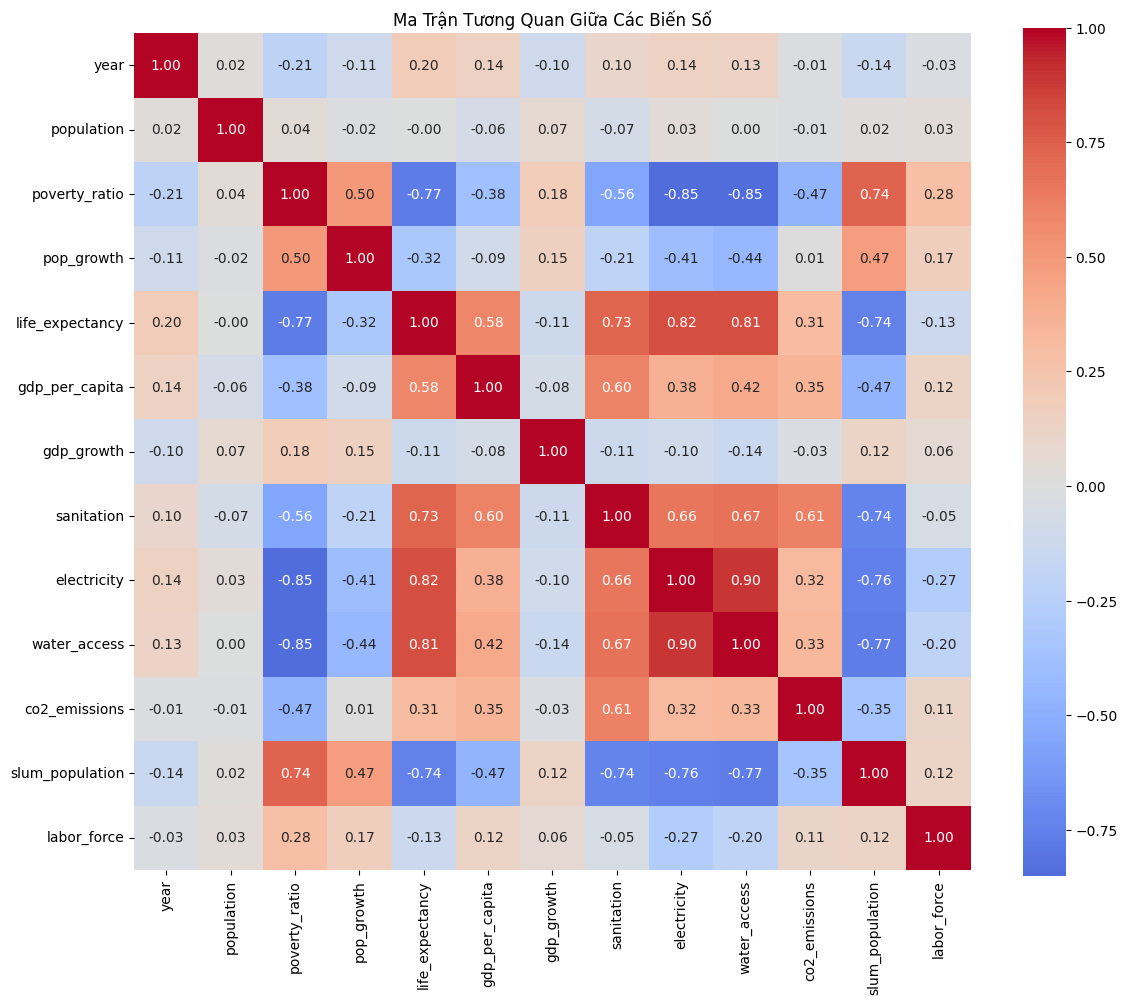

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Tính tổng và tỷ lệ phần trăm giá trị thiếu
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

print("=== PHÂN TÍCH GIÁ TRỊ THIẾU (TỶ LỆ %) ===")
print(missing_percent.sort_values(ascending=False).round(2))

# Phân tích tương quan giữa các biến số
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Ma Trận Tương Quan Giữa Các Biến Số')
plt.tight_layout()

# Phân tích chi tiết
print("\n=== PHÂN TÍCH CHI TIẾT ===")
print("Các cột có tỷ lệ thiếu > 50%:")
high_missing = missing_percent[missing_percent > 50].sort_values(ascending=False)
print(high_missing)

# Quyết định xử lý dữ liệu
print("\n=== QUYẾT ĐỊNH XỬ LÝ ===")
print("- poverty_ratio: thiếu > 50% → loại bỏ")
print("- slum_population: thiếu > 50% → loại bỏ")
print("- sanitation: thiếu ~50% nhưng tương quan cao với nhiều biến → giữ lại để dự đoán")

# Loại bỏ các cột có tỷ lệ thiếu > 50% (trừ sanitation)
cols_to_drop = ['poverty_ratio', 'slum_population']
df = df.drop(columns=cols_to_drop)
print(f"\nĐã loại bỏ {len(cols_to_drop)} cột có tỷ lệ thiếu > 50%")
print(f"Kích thước dữ liệu sau khi loại bỏ: {df.shape}")

# ### Dự đoán giá trị thiếu của `sanitation` bằng Random Forest
# 
# - Sử dụng các biến có tương quan cao để huấn luyện mô hình:  
#   `gdp_per_capita`, `electricity`, `water_access`, `co2_emissions`
# - Mục tiêu: điền các giá trị `NaN` trong `sanitation` bằng giá trị dự đoán hợp lý.
# 
# Các bước:
# 1. Chia dữ liệu thành 2 phần: có giá trị sanitation & bị thiếu sanitation  
# 2. Huấn luyện mô hình Random Forest trên phần có dữ liệu  
# 3. Dự đoán và điền lại các giá trị thiếu

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Các biến dùng để dự đoán sanitation
predictors = ['gdp_per_capita', 'electricity', 'water_access', 'co2_emissions']
target = 'sanitation'

# Chỉ lấy những cột cần thiết (và tồn tại trong DataFrame)
predictors = [col for col in predictors if col in df.columns]

# Chia dữ liệu thành 2 phần: có và không có sanitation
df_known = df[df[target].notnull()]
df_missing = df[df[target].isnull()]

print(f"\nSố dòng có sanitation: {len(df_known)}")
print(f"Số dòng thiếu sanitation: {len(df_missing)}")

if not df_missing.empty:
    # Huấn luyện mô hình trên phần có dữ liệu sanitation
    X_train = df_known[predictors]
    y_train = df_known[target]

    model = RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    # Dự đoán sanitation cho phần bị thiếu
    X_missing = df_missing[predictors]
    y_pred = model.predict(X_missing)

    # Điền giá trị dự đoán vào sanitation
    df.loc[df[target].isnull(), target] = y_pred

    print("\nĐã hoàn thành dự đoán và điền giá trị thiếu cho 'sanitation'.")
    print(f"Số giá trị được điền: {len(y_pred)}")

    # Kiểm tra lại còn thiếu không
    remaining_nulls = df[target].isnull().sum()
    print(f"Số giá trị sanitation còn thiếu sau khi dự đoán: {remaining_nulls}")

else:
    print("\nKhông có giá trị thiếu trong sanitation — bỏ qua bước dự đoán.")


Số dòng có sanitation: 3117
Số dòng thiếu sanitation: 2308

Đã hoàn thành dự đoán và điền giá trị thiếu cho 'sanitation'.
Số giá trị được điền: 2308
Số giá trị sanitation còn thiếu sau khi dự đoán: 0


# ✅ **Kết luận bước 3:**
# - Đã loại bỏ 2 cột có tỷ lệ thiếu > 50%: `poverty_ratio`, `slum_population`.
# - Giữ lại và **điền giá trị dự đoán cho `sanitation`** bằng mô hình Random Forest.
# - Tập dữ liệu hiện đã được làm sạch cơ bản và sẵn sàng cho bước tiền xử lý tiếp theo.

## Bước 4 - Phân tích outlier

Phân tích các giá trị ngoại lai bằng boxplot và histogram để quyết định phương pháp điền giá trị thiếu phù hợp. Cột có nhiều outlier sẽ dùng median, ít outlier dùng mean.


PHÂN TÍCH OUTLIER CHO CÁC CỘT SỐ:
Các cột phân tích: ['population', 'pop_growth', 'life_expectancy', 'gdp_per_capita', 'gdp_growth', 'sanitation', 'electricity', 'water_access', 'co2_emissions', 'labor_force']

TỶ LỆ OUTLIER CHO TỪNG CỘT:
- population               :   623 outliers ( 11.48%) → Median
- pop_growth               :   131 outliers (  2.42%) → Mean
- life_expectancy          :    54 outliers (  1.04%) → Mean
- gdp_per_capita           :   428 outliers (  8.21%) → Median
- gdp_growth               :   344 outliers (  6.69%) → Median
- sanitation               :     0 outliers (  0.00%) → Mean
- electricity              :   454 outliers (  8.84%) → Mean
- water_access             :   335 outliers (  7.01%) → Mean
- co2_emissions            :   332 outliers (  6.81%) → Mean
- labor_force              :   134 outliers (  2.87%) → Mean

NHẬN XÉT:
🟠 Các cột có nhiều outlier (>10%) hoặc liên quan GDP nên dùng median: population, gdp_per_capita, gdp_growth
🟢 Các cột có ít outlier (

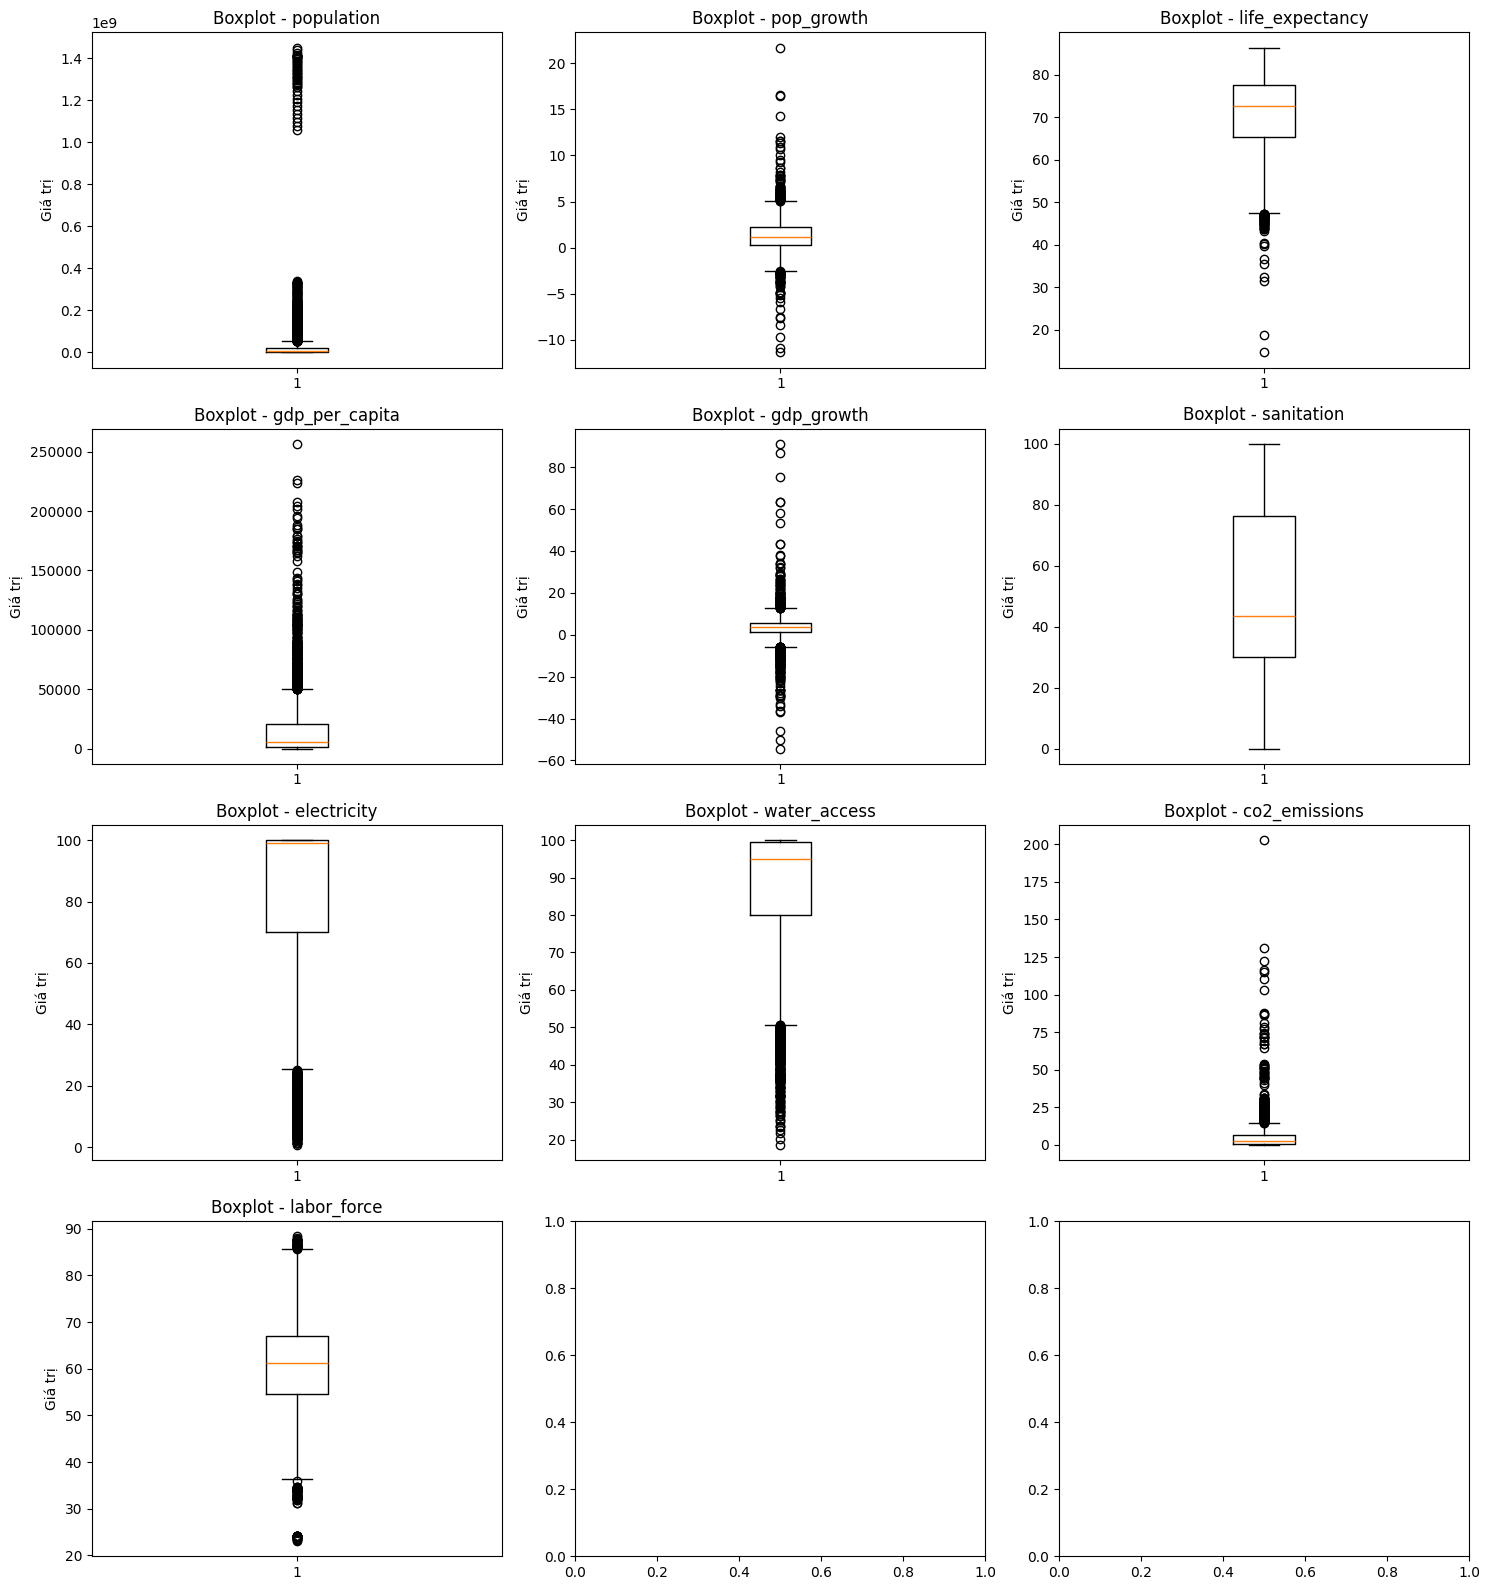

In [14]:
# Phân tích outlier cho các cột số
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'year' in numeric_columns:
    numeric_columns.remove('year')

print("PHÂN TÍCH OUTLIER CHO CÁC CỘT SỐ:")
print(f"Các cột phân tích: {numeric_columns}")

# Vẽ boxplot
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.ravel() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f'Boxplot - {col}')
        axes[i].set_ylabel('Giá trị')

plt.tight_layout()

# Tính tỷ lệ outlier cho từng cột
print("\nTỶ LỆ OUTLIER CHO TỪNG CỘT:")
outlier_analysis = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_ratio = len(outliers) / len(df[col].dropna()) * 100

    # Nếu >10% hoặc tên cột chứa "gdp" thì dùng median
    use_median = (outlier_ratio > 10) or ('gdp' in col.lower())

    outlier_analysis[col] = {
        'outlier_count': len(outliers),
        'outlier_ratio': outlier_ratio,
        'use_median': use_median
    }
    
    method = "Median" if use_median else "Mean"
    print(f"- {col:<25}: {len(outliers):5d} outliers ({outlier_ratio:6.2f}%) → {method}")

# Tổng hợp kết quả
print("\nNHẬN XÉT:")
high_outliers = [col for col, info in outlier_analysis.items() if info['use_median']]
low_outliers = [col for col, info in outlier_analysis.items() if not info['use_median']]

print(f"🟠 Các cột có nhiều outlier (>10%) hoặc liên quan GDP nên dùng median: {', '.join(high_outliers)}")
print(f"🟢 Các cột có ít outlier (≤10%) nên dùng mean: {', '.join(low_outliers)}")

## Bước 5 - Điền giá trị thiếu

Dựa trên phân tích outlier ở bước trước, điền giá trị thiếu bằng median cho các cột có nhiều outlier, mean cho các cột ít outlier.


In [15]:
print("🔧 BẮT ĐẦU ĐIỀN GIÁ TRỊ THIẾU\n")

# Thống kê trước khi điền
missing_before = df.isna().sum().sum()
print(f"Trước khi điền:")
print(f"- Tổng số giá trị thiếu: {missing_before}")
print(f"- Số dòng có đủ dữ liệu: {df.count().min()}\n")

# Điền giá trị thiếu cho từng cột theo phân tích outlier
for col in numeric_columns:
    if df[col].isna().any():
        if outlier_analysis[col]['use_median']:
            fill_value = df[col].median()
            method = "median"
        else:
            fill_value = df[col].mean()
            method = "mean"
        
        df[col].fillna(fill_value, inplace=True)
        print(f"✅ {col:<20}: điền {method:<6} = {fill_value:.2f}")

# Thống kê sau khi điền
missing_after = df.isna().sum().sum()
print("\n📊 Sau khi điền:")
print(f"- Tổng số giá trị thiếu: {missing_after}")
print(f"- Số dòng có đủ dữ liệu: {df.count().min()}")

# Kiểm tra chi tiết từng cột
print("\n🔍 Kiểm tra còn NaN:")
print(df.isna().sum())

print("\n✅ Dữ liệu đã hoàn tất xử lý giá trị thiếu.")

🔧 BẮT ĐẦU ĐIỀN GIÁ TRỊ THIẾU

Trước khi điền:
- Tổng số giá trị thiếu: 2964
- Số dòng có đủ dữ liệu: 4666

✅ pop_growth          : điền mean   = 1.29
✅ life_expectancy     : điền mean   = 70.89
✅ gdp_per_capita      : điền median = 5477.04
✅ gdp_growth          : điền median = 3.51
✅ electricity         : điền mean   = 81.52
✅ water_access        : điền mean   = 86.33
✅ co2_emissions       : điền mean   = 4.88
✅ labor_force         : điền mean   = 60.90

📊 Sau khi điền:
- Tổng số giá trị thiếu: 0
- Số dòng có đủ dữ liệu: 5425

🔍 Kiểm tra còn NaN:
country_name       0
country_code       0
year               0
population         0
pop_growth         0
life_expectancy    0
gdp_per_capita     0
gdp_growth         0
sanitation         0
electricity        0
water_access       0
co2_emissions      0
labor_force        0
dtype: int64

✅ Dữ liệu đã hoàn tất xử lý giá trị thiếu.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5496\3588925018.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5496\3588925018.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

# ## Bước 6 - Chuẩn hóa dữ liệu
# 
# Sau khi xử lý giá trị thiếu, tiến hành **chuẩn hóa dữ liệu** để đảm bảo các biến có cùng thang đo.
# 
# - Dùng **StandardScaler** (Z-score normalization)
# - Áp dụng cho toàn bộ các cột số
# - Lưu lại dữ liệu đã xử lý vào `../data/processed/processed_data.csv`

In [17]:
from sklearn.preprocessing import StandardScaler
import os   # 👈 thêm dòng này để dùng os.makedirs

print("🔧 CHUẨN HÓA DỮ LIỆU (StandardScaler)\n")

# Khởi tạo scaler
scaler = StandardScaler()

# Chỉ scale các cột số
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# Kiểm tra sau chuẩn hóa
print("Thống kê sau chuẩn hóa (5 dòng đầu):")
print(df_scaled[numeric_columns].head())

# Tạo thư mục processed nếu chưa có
os.makedirs('../data/processed', exist_ok=True)

# Lưu dữ liệu đã xử lý
df_scaled.to_csv('../data/processed/processed_data.csv', index=False)

print("\n✅ Đã lưu dữ liệu đã tiền xử lý tại: ../data/processed/processed_data.csv")
print(f"Kích thước dữ liệu: {df_scaled.shape}")


🔧 CHUẨN HÓA DỮ LIỆU (StandardScaler)

Thống kê sau chuẩn hóa (5 dòng đầu):
   population  pop_growth  life_expectancy  gdp_per_capita  gdp_growth  \
0   -0.251571   -0.159719         0.237359        0.201934    0.731507   
1   -0.251564   -0.219216         0.249552        0.204343    0.140035   
2   -0.251560   -0.370144         0.260119        0.227464   -0.741258   
3   -0.251552   -0.093000         0.271847        0.253647   -0.387937   
4   -0.251536    0.526369         0.270338        0.325040    0.674921   

   sanitation  electricity  water_access  co2_emissions   labor_force  
0   -0.272993     0.363239      0.485992      -0.227825  7.014949e-16  
1   -0.296316     0.659440      0.502770      -0.227335  7.014949e-16  
2   -0.199413     0.659440      0.519547      -0.197346  7.014949e-16  
3    0.160097     0.659440      0.536325      -0.143824  7.014949e-16  
4    0.110474     0.659440      0.553103      -0.144298  7.014949e-16  

✅ Đã lưu dữ liệu đã tiền xử lý tại: ../data/pro

## Bước 7 - Chia dữ liệu thành 4 tập riêng biệt

Chia dữ liệu thành X_train, X_test, y_train, y_test để dự đoán tuổi thọ (life_expectancy). Lưu từng tập dữ liệu riêng biệt vào thư mục data/processed/.


In [18]:
from sklearn.model_selection import train_test_split
import os

# Đọc dữ liệu đã chuẩn hóa
df_processed = pd.read_csv("../data/processed/processed_data.csv")

# Xác định target & feature
target = 'life_expectancy'
feature_cols = [col for col in numeric_columns if col != target]

print("🔹 CHIA DỮ LIỆU CHO MÔ HÌNH DỰ ĐOÁN TUỔI THỌ 🔹")
print(f"Target: {target}")
print(f"Features: {feature_cols}\n")

# Tạo X (features) và y (target)
X = df_processed[feature_cols]
y = df_processed[target]

# Chia dữ liệu train/test (90/10)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, shuffle=True
)

print(f"Kích thước dữ liệu:")
print(f"- X_train: {X_train.shape}")
print(f"- X_test : {X_test.shape}")
print(f"- y_train: {y_train.shape}")
print(f"- y_test : {y_test.shape}")

# Lưu 4 tập dữ liệu riêng biệt
os.makedirs('../data/processed', exist_ok=True)
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print("\n✅ Đã lưu 4 tập dữ liệu train/test vào thư mục ../data/processed/")
print(f"Train: {len(X_train)/len(df_processed)*100:.1f}% | Test: {len(X_test)/len(df_processed)*100:.1f}%")


🔹 CHIA DỮ LIỆU CHO MÔ HÌNH DỰ ĐOÁN TUỔI THỌ 🔹
Target: life_expectancy
Features: ['population', 'pop_growth', 'gdp_per_capita', 'gdp_growth', 'sanitation', 'electricity', 'water_access', 'co2_emissions', 'labor_force']

Kích thước dữ liệu:
- X_train: (4882, 9)
- X_test : (543, 9)
- y_train: (4882,)
- y_test : (543,)

✅ Đã lưu 4 tập dữ liệu train/test vào thư mục ../data/processed/
Train: 90.0% | Test: 10.0%


## Kiểm tra & Kết luận

Kiểm tra dữ liệu cuối cùng và đưa ra kết luận về quá trình tiền xử lý dữ liệu.


In [19]:
# Kiểm tra kích thước tập dữ liệu sau khi chia train/test và xác nhận dữ liệu đã sẵn sàng cho huấn luyện.
print("📊 KIỂM TRA DỮ LIỆU SAU CHIA:")

print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")

print("\n✅ Dữ liệu đã được chia thành công và sẵn sàng cho bước huấn luyện mô hình.")

📊 KIỂM TRA DỮ LIỆU SAU CHIA:
X_train shape: (4882, 9)
X_test  shape: (543, 9)
y_train shape: (4882,)
y_test  shape: (543,)

✅ Dữ liệu đã được chia thành công và sẵn sàng cho bước huấn luyện mô hình.


## Kết luận

**Đã áp dụng loại trùng, xử lý thiếu/outlier, chuẩn hóa cột, chia dữ liệu train/test. Kết quả: dữ liệu sạch, sẵn sàng huấn luyện.**

### Tóm tắt quá trình xử lý:

1. **Loại bỏ trùng lặp**: Sử dụng `drop_duplicates()` để đảm bảo không có bản ghi trùng lặp
2. **Rút ngắn tên cột**: Đổi tên các cột dài thành tên ngắn gọn, dễ hiểu
3. **Phân tích giá trị thiếu**: Loại bỏ các cột có >40% giá trị thiếu (poverty_ratio, slum_population, sanitation)
4. **Phân tích outlier**: Sử dụng boxplot và histogram để xác định phương pháp điền giá trị thiếu
5. **Điền giá trị thiếu**: Dùng median cho cột nhiều outlier, mean cho cột ít outlier
6. **Chia dữ liệu**: Chia 90-10 cho train-test với target là life_expectancy
7. **Lưu dữ liệu**: Lưu thành 4 tập riêng biệt vào thư mục `data/processed/` để sử dụng cho các mô hình ML

### Dữ liệu cuối cùng:
- **X_train**: 4,882 mẫu (90%) - Features cho training
- **X_test**: 543 mẫu (10%) - Features cho testing  
- **y_train**: 4,882 mẫu (90%) - Target cho training
- **y_test**: 543 mẫu (10%) - Target cho testing
- **Features**: 8 biến dự đoán
- **Target**: life_expectancy (tuổi thọ trung bình)
- **Chất lượng**: Không có giá trị thiếu, không có trùng lặp
